Load all packages you need.

In [2]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the data.

In [4]:
df = pd.read_csv('data/pima-indians-diabetes-database/diabetes.csv')

Bin the variable "Age" into useful intervals. Inspect the bins.

C:\Users\schiltem93\AppData\Local\Temp\ipykernel_4592\72884393.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('AgeGroup')['Age'].agg(['mean', 'median'])


                  mean  median
AgeGroup                      
21-29        24.313131    24.0
30-39 years  34.109091    34.0
40-49        43.466102    43.0
50-59        53.842105    53.0
60+          64.843750    64.5


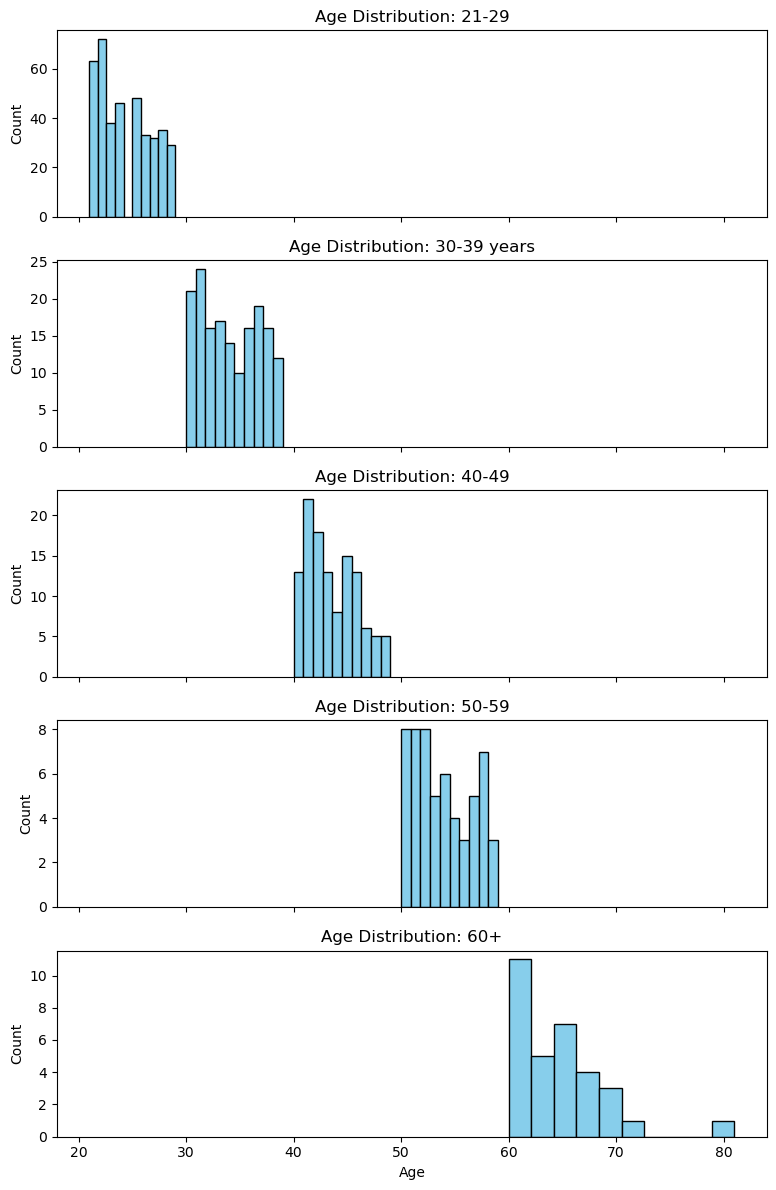

In [20]:
# Define age bins and labels
bins = [20, 29, 39, 49, 59, 100]
labels = ['21-29', '30-39 years', '40-49', '50-59', '60+']

# Create a new column 'AgeGroup' with the binned ages
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Calculate mean and median for each age bin
age_stats = df.groupby('AgeGroup')['Age'].agg(['mean', 'median'])
print(age_stats)

# Create individual histograms for each age bin as subplots
fig, axes = plt.subplots(len(labels), 1, figsize=(8, 12), sharex=True)

for i, group in enumerate(labels):
    subset = df[df['AgeGroup'] == group]
    axes[i].hist(subset['Age'], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Age Distribution: {group}')
    axes[i].set_ylabel('Count')

plt.xlabel('Age')
plt.tight_layout()
plt.show()

The distribution of the serum "Insulin" seems to be skewed. <br> Create a histogram of the Insulin levels. Perform a log-transformation on the "Insulin" variable and recreate the histogram. What do you notice?

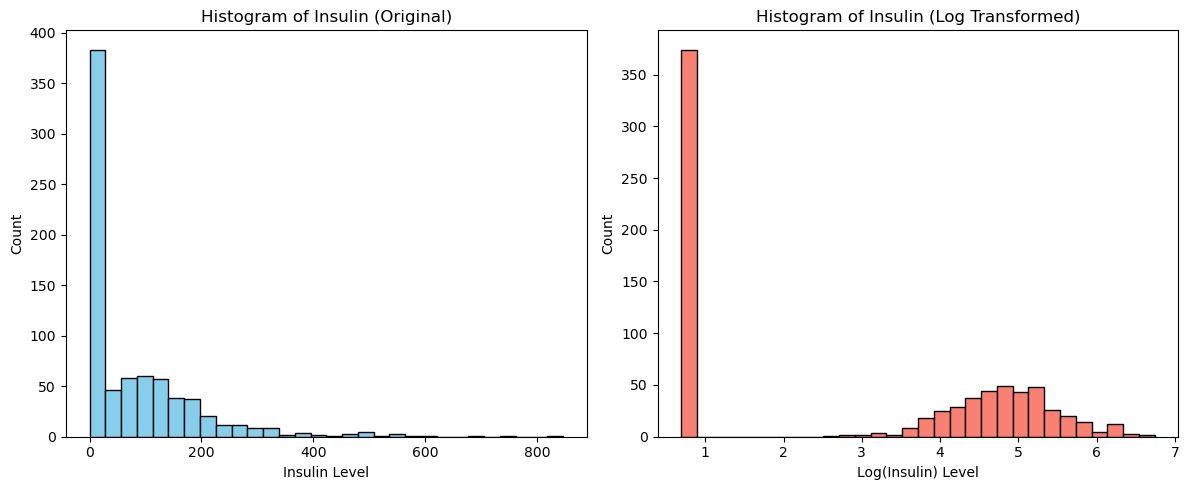

In [21]:

# Replace zero insulin values with a small value (1) before log transformation
df['Insulin_nonzero'] = df['Insulin'].replace(0, 1)
df['Insulin_log'] = np.log1p(df['Insulin_nonzero'])

# Create histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Insulin distribution
axes[0].hist(df['Insulin'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Insulin (Original)')
axes[0].set_xlabel('Insulin Level')
axes[0].set_ylabel('Count')

# Log-transformed Insulin distribution
axes[1].hist(df['Insulin_log'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Histogram of Insulin (Log Transformed)')
axes[1].set_xlabel('Log(Insulin) Level')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()